<a href="https://colab.research.google.com/github/codybaraks/visuals-strictly/blob/master/Copy_of_IMDB_GROUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB MOVIE REVIEWS SENTIMENTAL ANALYSIS USING TENSORFLOW



# 1.1 Introduction

* Sentimental analysis is very useful in social media monitoring.
* It helps companies extract insights from social media data.
* For example, a company can gain an overview of wider public opinion about a particular topic.
* In this project, we will work on sentimental anlysis of IMDB Movie Reviews.


## 1.1.1 Defining the Question

* Classifying/Predicting whether a movie review is positive or negative.

## 1.1.2 Metrics for Success
* Achieve an Accuracy score of about 90%.

## 1.1.3 The Context

* IMDB(Internet Movie Database):

    * It is the world's most popular source of movie,Tv and celebrity content
    
    * Find rating and reviews for the latest movies and Tv shows 

  



## 1.1.4 Experimental Design Taken

* Loading the data
* Data Cleaning
* Perform Exploratory Data Analysis
* Visualizations
* 

## 1.1.5 Appropriateness of the Data

* The dataset contains 50,000 movie reviews.
* It was obtained from Kaggle.com.
* Link to the data: [link text](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

# 1.2 Importing the Libraries

In [0]:
# Importing Libraries we need for our analysis

import pandas as pd
import numpy as np
from numpy import array,asarray,zeros

# Embedding
from keras.layers.embeddings import Embedding

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

# import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding,LSTM,Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import requests
from io import StringIO
# nltk
import nltk

In [0]:
from plotnine import *


# 1.3 Loading the dataset

In [0]:
# Creating a function to load the dataset from google drive

def read_data(path):
  path = 'https://drive.google.com/uc?export=download&id=' + path.split('/')[-2]
  csv_raw = requests.get(path).text
  csv = StringIO(csv_raw)
  return csv

In [0]:
# Loading the data using the function created 

movies = pd.read_csv(read_data('https://drive.google.com/file/d/1DAQYMCtnVU4n914iZA94FBhxypxjB61X/view?usp=sharing'))

# EXPLORATORY DATA ANALYSIS

In [32]:
# Checking the first five observations from the dataset.
 
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [33]:
# Checking the last first five observations of our dataset

movies.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [34]:
# Checking the shape of the dataset

movies.shape

(50000, 2)

There are 50,000 rows and 2 columns.

In [35]:
# Checking the dataset information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.3+ KB


* Both columns contain string data types.
* The dataset has no missing values.


In [36]:
# checking the frequency of positive and negative reviews

movies.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

The dataset is balanced since we have equal number of positive and negative reviews.

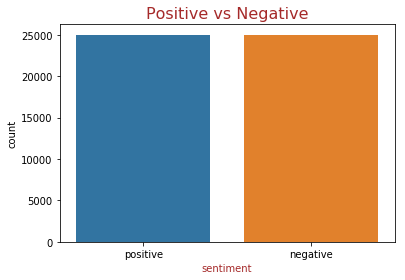

In [37]:
# Visualization to indicate that the dataset is balanced
sns.countplot(movies.sentiment)
plt.xlabel('sentiment', color="brown")
plt.title('Positive vs Negative', fontsize=16, color='brown')
plt.show()

# 1.4 Data Cleaning/ Preprocessing the Data



In [0]:
# Here we create a function to clean the text data
# we will use regular expressions here alot since our data dtype is string.

def cleaning(data):
  
  # removing tags
  phrase = remove_tags(data)
  
  # remove special characters i.e r
  # remove anything thats not a to z or A-Z
  
  phrase = re.sub('[^a-zA-Z]', ' ', phrase)
  
  # remove multiple spaces
  phrase = re.sub(r'\s+', ' ',phrase)
  
  return phrase
  


In [0]:
# This is to initialize the function to 
# remove the tags
# earlier created in the previus function.


TAG_RE = re.compile(r'<[^>]+>')


def remove_tags(text):
  return TAG_RE.sub('', text)

In [0]:
X = []
phrases = list(movies['review'])
for data in phrases:
  X.append(cleaning(data))

In [78]:
# clean_real = movies.review.apply(lambda x: cleaning(x))
X[0:4]

['One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare Forget pretty 

### **The above text shows that special characters have been removed**

In [79]:
movies.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [0]:
phrases = list(movies['review'])

In [80]:
 # checking the 21st review we get the result below
X[10000]

' While sporadically engrossing including a few effectively tender moments and humorous the sledgehammer obvious satire Homecoming hinges on comes off as forced and ultimately unfulfilling With material like this timing is everything Michael Moore knew to release Fahrenheit before the elections and the real tragedy of Dante s film is that it didn t come out years ago when its message would have carried an energy that would have energized the dissidents further In mockery of the well settled Bush Administration hardly seems as controversially compelling or imperiled as it did then frankly anyone that could be convinced of anything by a ham fisted zombie flick has questionable intelligence and if you didn t notice michael moore didn t exactly help to defeat bush there was nothing engrossing about this film i just felt disgust at how blatant and frankly stupid the film was it was painful to watch if you are going to do something like this you need a bit of wit sadly this has none a poorly

## **TSNE**

**Making use of TSNE which maps objects with similarity**

In [0]:
from sklearn.manifold import TSNE
from gensim.models import word2vec

In [0]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> u

Nothing to update.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [103]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop_words = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in stop_words:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence
  

 

In [0]:
movies.review = movies.review.apply(lambda x: clean_sentence(x))
movies.review

In [87]:
# Corpus - still tring to find out but strength of words
#  strength of words,
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['review']:
        for sentence in movies[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus
  
corpus = build_corpus(data)        
corpus[0:2]

[['One',
  'of',
  'the',
  'other',
  'reviewers',
  'has',
  'mentioned',
  'that',
  'after',
  'watching',
  'just',
  '1',
  'Oz',
  'episode',
  "you'll",
  'be',
  'hooked.',
  'They',
  'are',
  'right,',
  'as',
  'this',
  'is',
  'exactly',
  'what',
  'happened',
  'with',
  'me.<br',
  '/><br',
  '/>The',
  'first',
  'thing',
  'that',
  'struck',
  'me',
  'about',
  'Oz',
  'was',
  'its',
  'brutality',
  'and',
  'unflinching',
  'scenes',
  'of',
  'violence,',
  'which',
  'set',
  'in',
  'right',
  'from',
  'the',
  'word',
  'GO.',
  'Trust',
  'me,',
  'this',
  'is',
  'not',
  'a',
  'show',
  'for',
  'the',
  'faint',
  'hearted',
  'or',
  'timid.',
  'This',
  'show',
  'pulls',
  'no',
  'punches',
  'with',
  'regards',
  'to',
  'drugs,',
  'sex',
  'or',
  'violence.',
  'Its',
  'is',
  'hardcore,',
  'in',
  'the',
  'classic',
  'use',
  'of',
  'the',
  'word.<br',
  '/><br',
  '/>It',
  'is',
  'called',
  'OZ',
  'as',
  'that',
  'is',
  'the',

In [0]:
corpus = movies.review.apply(lambda x: build_corpus(x))
corpus

In [0]:

# corpus = build_corpus(data)        
# corpus

In [0]:
# Word2Vec: Feed forward neural network based model to find word embeddings
# word to vector
# model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
# model.wv['great']

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

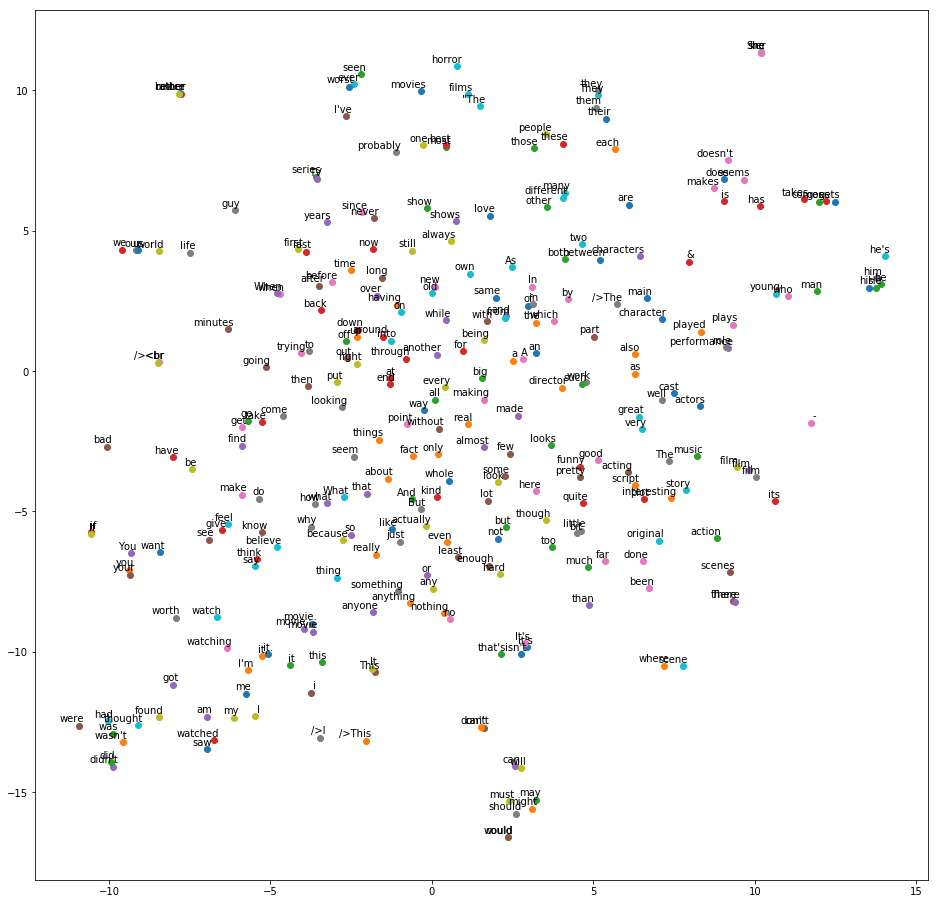

In [89]:
model = word2vec.Word2Vec(corpus, size=20, window=20, min_count=4000, workers=4)

tsne_plot(model)
  

### **If you have two words that have very similar neighbors (meaning: the context in which its used is about the same), then these words are probably quite similar in meaning or are at least related**

## **Creating word Clouds**

In [0]:
stop = set(stopwords.words('english'))

In [0]:
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator, STOPWORDS

In [91]:
movies.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [92]:
# Positive  Reviews
positive = movies[movies['sentiment'] == 'positive']
positive.sentiment.unique()

array(['positive'], dtype=object)

In [93]:
# Number of positive reviews we have
print('There are ' + str(positive.shape[0]) + ' positive reviews')

There are 25000 positive reviews


In [94]:
# Negative Reviews
negative = movies[movies['sentiment'] == 'negative']
negative.sentiment.unique()

array(['negative'], dtype=object)

In [95]:
# Number of negative reviews we have
print('There are ' + str(negative.shape[0]) + ' negative reviews')

There are 25000 negative reviews


In [96]:
# Word under positive Reviews
positive_review = " ".join(review for review in positive['review'])
print ("There are {} words in the positive combination of all review.".format(len(positive_review)))

There are 33151187 words in the positive combination of all review.


In [97]:
# Words under Negative Reviews
negative_review = " ".join(review for review in negative['review'])
print ("There are {} words in the negative combination of all review.".format(len(negative_review)))

There are 32382319 words in the negative combination of all review.


In [0]:
stopwords = set(STOPWORDS)

In [119]:
w1 = "good"
model.wv.most_similar (positive=w1)

[('funny', 0.7944675087928772),
 ('acting', 0.7500409483909607),
 ('pretty', 0.7330362796783447),
 ('very', 0.6685581207275391),
 ('bad', 0.6331316232681274),
 ('great', 0.6231651306152344),
 ('really', 0.6215404868125916),
 ('script', 0.5755051970481873),
 ('well', 0.5568898916244507),
 ('lot', 0.5549192428588867)]

In [125]:
# Similarity of words 

model.wv.similarity(w1 ="guy",w2="good")

0.23827949

In [124]:
# Similarity of words 

model.wv.similarity(w1 ="guy",w2="bad")

0.5494633

In [126]:

model.wv.similarity(w1 ="see",w2="watch")

0.75553167

## **Word Cloud**

**Word cloud  - give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s). This type of visualization can assist evaluators with exploratory textual analysis**

### **Plot for Positive Words**

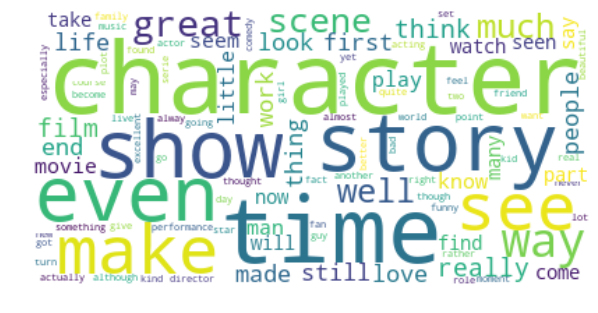

In [115]:
stopwords.update(["Nan","Negative","etc", "br", 'film', 'movie', 'one'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100).generate(positive_review)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Plot For Negative Words**

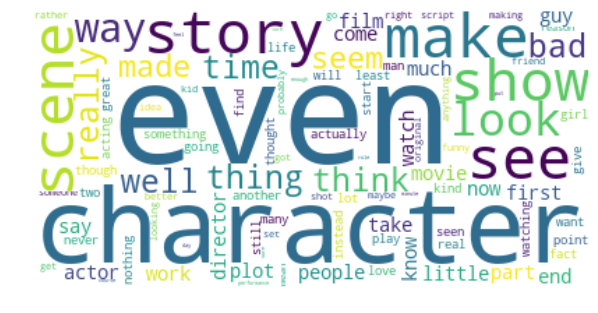

In [116]:
stopwords.update(["Nan","positive","happy", "br", 'film', 'good', 'best'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100).generate(negative_review)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
text = " ".join(review for review in movies['review'])

In [0]:
stopwords = set(stop_words)
stopwords.update(["Nan","Negative","etc", "br", 'movie', 'film', 'one', 'make', 'even'])
# film
cloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)

### **Showing the most Used term in the  reviews**

In [0]:
plt.figure(figsize=(10,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [130]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [0]:
import plotly
import plotly.graph_objs as go
from plotly.offline import *

In [0]:
%matplotlib inline

In [145]:
all_words = movies['review'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')
fig.show()



In [0]:
# Defining our y; the label
# Since it is a strings we map it to numericals

y = movies['sentiment']

y = np.array(list(map(lambda x: 1 if x=='positive' else 0,y)))

In [0]:
print(X)

In [0]:
# Splitting our data into train and test sets
# we will use 80% training set and 20% test set

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [0]:
print(X)

In [0]:
# Creating the embedding layer.
# The embedding layer converts our textual data into numerical data.
# It is used as the first layer for the deep learning models in keras.


# The tokenizer module creates a word to index dictionary.
# Each word is used as key while the corresponding unique index,
# is used as the value for the key.

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
# viewing the converted words to numericals in the X_train
X_train

From the output;
* Here we have 40,000 lists.
* Each list contains integers.
* Each list corrensponds to each sentence in the training set.
* The size of each list is different as each sentence has different lengths.


In [0]:
# We will set a maximum size of each list to 100
# The lists with > 100 will truncated.
# Lists with < 100 will be added 0 till the maximum length.
# This process is called padding

# The code below will find the vocabulary size and then perfom Padding 
# on both X_train and X_test

# tokenizer.word_index

vocab_size  = len(tokenizer.word_index)+ 1

maxlength = 100

X_train = pad_sequences(X_train, padding="post", maxlen=maxlength)
X_test = pad_sequences(X_test, padding="post", maxlen=maxlength)

In [0]:
# Checking that a random list in X_train (previously sentences)
# have the same length of 100

len(X_train[2])

In [0]:
# Checking that a random list in X_test (previously sentences)
# have the same length of 100
len(X_test[5])

In [0]:
# Viewing our X_train
X_train

In [0]:
# Viewing our X_test
X_test

In [0]:
# checking the size of our vocabulary in our corpus
# A corpus is a collection of texts

vocab_size

The output indicates that we have 92547 unique words in the corpus.

In [0]:
# Creating a feature matrix
# Here we wil use GloVe Embeddings
# GloVe stands for Global Vectors for word representation.
# It is an unsupervised learning algorithm developed by Stanford for,
# Generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus
# The resulting

embedding_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")


for line in glove_file:
  record = line.split()
  word = record[0]
  dimensions = asarray(record [1:], dtype="float32")
  embedding_dictionary [word] = dimensions
glove_file.close()


In [0]:
# Creating an Embedding matrix

embedding_matrix  = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embedding_dictionary.get(word)
  if embedding_vector  is not None:
    embedding_matrix[index] = embedding_vector

In [0]:
embedding_vector

In [0]:
embedding_matrix

In [0]:

embedding_dictionary

# 

# Modelling 

## Using a Simple Deep Neural Network
 * Also called a Densely connected neural network.
 * Its the Basic Neural Network.

In [0]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights = [embedding_matrix],
                            input_length = maxlength, trainable = False)

model.add(embedding_layer)

model.add(Flatten())

model.add(Dense(1, activation = 'sigmoid'))


In [0]:
# 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['acc'])


print(model.summary())

In [0]:
output = model.fit(X_train, y_train, batch_size = 128, 
                   epochs = 20, verbose = 1,
                  validation_split = 0.2 )

In [0]:
score = model.evaluate(X_test, y_test, verbose = 1)

In [0]:
score[0]

In [0]:
score[1]